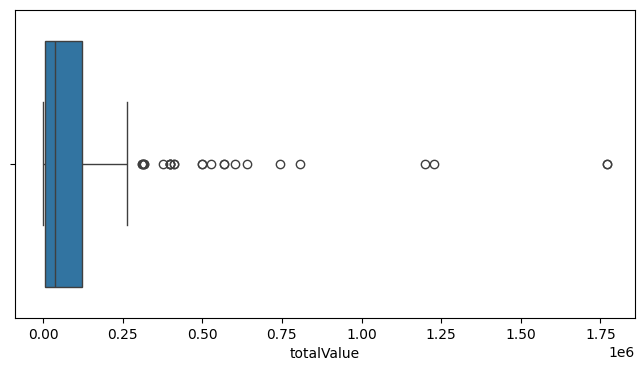

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats.mstats import winsorize

order_v3 = pd.read_csv("Order_v3.csv", encoding = "ISO-8859-1")

plt.figure(figsize=(8, 4))
sns.boxplot(x=order_v3['totalValue'])
plt.show()

In [2]:
order_v3["z_score"] = zscore(order_v3["totalValue"])

outliers_positivos = order_v3[order_v3['z_score'] > 3]
outliers_negativos = order_v3[order_v3['z_score'] < -3] 


print("Valores atípicos detectados:\n", outliers_positivos, outliers_negativos)

Valores atípicos detectados:
      orderIdentifier orderType vendor.organizationIdentifier  \
90        1000567422   INBOUND                      Flexilux   
140       1000567256   INBOUND                      Flexilux   
146       1000567276   INBOUND                      Flexilux   
210        100044331  OUTBOUND                     LightTree   

    buyer.organizationIdentifier  \
90                     LightTree   
140                    LightTree   
146                    LightTree   
210                         QPWD   

    shipFromInstructionLocation.locationIdentifier  \
90                            Flexilux - Worcester   
140                           Flexilux - Worcester   
146                           Flexilux - Worcester   
210                                           LT-2   

    shipToLocation.locationIdentifier  orderStatus          createdDate  \
90                               LT-1          NaN  2021-06-16T00:00:00   
140                              LT-2          

In [3]:
Q1 = np.percentile(order_v3['totalValue'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(order_v3['totalValue'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = order_v3[(order_v3['totalValue'] < limite_inferior) | (order_v3['totalValue'] > limite_superior)]
outliers

,orderIdentifier,orderType,vendor.organizationIdentifier,buyer.organizationIdentifier,shipFromInstructionLocation.locationIdentifier,shipToLocation.locationIdentifier,orderStatus,createdDate,requestedShipDate,requestedDeliveryDate,...,plannedDeliveryDate,quantity,quantityUnits,totalValue,orderValueCurrency,lineCount,totalShippedQuantity,exclude,sourceLink,z_score
8,100044355,OUTBOUND,LightTree,AHTD,LT-1,AHTD - Bentonville,NaN,2021-06-08T00:00:00,2021-06-30T00:00:00,2021-07-07T00:00:00,...,2021-07-07T00:00:00,400,EA,500000.0,USD,3,NaN,NaN,http://lighttree.com/100044355,1.567479
10,100044344,OUTBOUND,LightTree,CALTRAN,LT-1,CALTRAN - San Diego,NaN,2021-06-11T00:00:00,2021-07-28T00:00:00,2021-08-03T00:00:00,...,2021-08-03T00:00:00,302,EA,377500.0,USD,3,NaN,NaN,http://lighttree.com/100044344,1.058220
18,100044347,OUTBOUND,LightTree,CALTRAN,LT-1,CALTRAN - San Diego,NaN,2021-06-11T00:00:00,2021-07-11T00:00:00,2021-07-19T00:00:00,...,2021-07-19T00:00:00,645,EA,806250.0,USD,3,NaN,NaN,http://lighttree.com/100044347,2.840626
25,100044323,OUTBOUND,LightTree,FAA,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-31T00:00:00,2021-09-06T00:00:00,...,2021-09-07T00:00:00,250,EA,312500.0,USD,3,NaN,NaN,http://lighttree.com/100044323,0.788002
28,100044322,OUTBOUND,LightTree,FAA,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-11T00:00:00,2021-08-14T00:00:00,...,NaN,400,EA,500000.0,USD,3,NaN,NaN,http://lighttree.com/100044322,1.567479
29,100044335,OUTBOUND,LightTree,KYTC,LT-2,KYTC - Lexington,NaN,2021-06-28T00:00:00,2021-07-20T00:00:00,2021-07-24T00:00:00,...,2021-07-28T00:00:00,320,EA,400000.0,USD,3,NaN,NaN,http://lighttree.com/100044335,1.151758
43,1000567254,INBOUND,Brewers,LightTree,Brewers - Phoenix,LT-1,NaN,2021-06-16T00:00:00,2021-06-23T00:00:00,2021-06-27T00:00:00,...,2021-06-27T00:00:00,512,EA,745472.0,USD,1,NaN,NaN,http://lighttree.com/1000567254,2.587959
78,1000567388,INBOUND,Total Source,LightTree,Total Source - Waukesha,LT-1,NaN,2021-06-16T00:00:00,2021-06-23T00:00:00,2021-06-27T00:00:00,...,2021-06-27T00:00:00,512,EA,528384.0,USD,1,NaN,NaN,http://lighttree.com/1000567388,1.685477
90,1000567422,INBOUND,Flexilux,LightTree,Flexilux - Worcester,LT-1,NaN,2021-06-16T00:00:00,2021-06-23T00:00:00,2021-06-27T00:00:00,...,2021-06-27T00:00:00,512,EA,1227776.0,USD,1,NaN,NaN,http://lighttree.com/1000567422,4.592999
105,1000567471,INBOUND,McGrey,LightTree,McGrey - Mt Sterling,LT-1,NaN,2021-06-16T00:00:00,2021-06-23T00:00:00,2021-06-27T00:00:00,...,2021-06-30T00:00:00,512,EA,604160.0,USD,1,NaN,NaN,http://lighttree.com/1000567471,2.000494


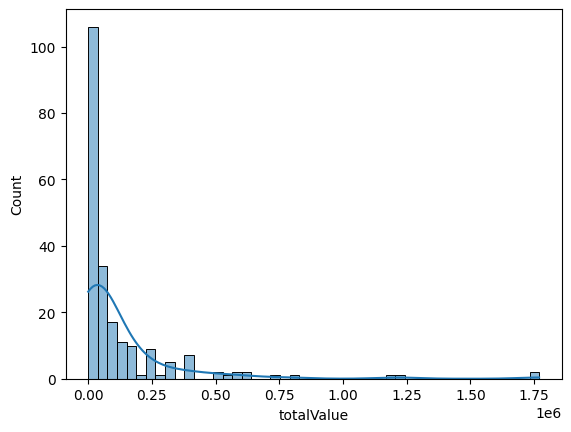

In [4]:
sns.histplot(order_v3['totalValue'], kde=True)
plt.show()

In [5]:
print("Skewness:", skew(order_v3['totalValue']))

Skewness: 4.273389123481969


In [6]:
order_v3['valores_log'] = np.log1p(order_v3['totalValue'])
print("Skewness:", skew(order_v3['valores_log']))

Skewness: -0.5777730330157603


In [7]:
order_v3['valores_winsor'] = winsorize(order_v3['totalValue'], limits=[0.05, 0.15])
print("Skewness:", skew(order_v3['valores_winsor']))

Skewness: 0.9104108058980581


DIABETES

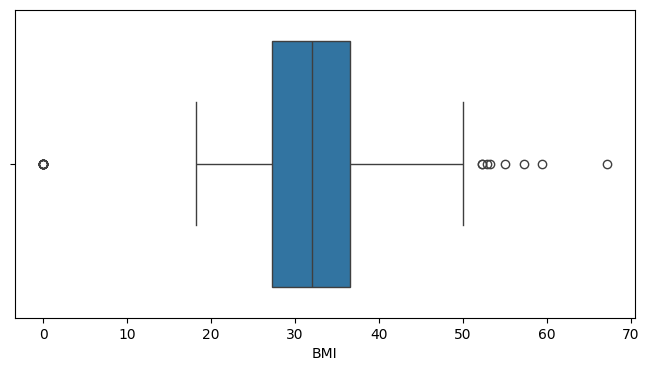

In [8]:
diabetes = pd.read_csv("diabetes.csv")

plt.figure(figsize=(8, 4))
sns.boxplot(x=diabetes['BMI'])
plt.show()

In [9]:
diabetes["z_score"] = zscore(diabetes["BMI"])

outliers_positivos = diabetes[diabetes['z_score'] > 3]
outliers_negativos = diabetes[diabetes['z_score'] < -3] 


print("Valores atípicos detectados:\n", outliers_positivos, outliers_negativos)

Valores atípicos detectados:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
177            0      129            110             46      130  67.1   
445            0      180             78             63       14  59.4   
673            3      123            100             35      240  57.3   

     DiabetesPedigreeFunction  Age  Outcome   z_score  
177                     0.319   26        1  4.455807  
445                     2.420   25        1  3.478529  
673                     0.880   22        0  3.211999        Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371        

In [10]:
Q1 = np.percentile(diabetes['BMI'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(diabetes['BMI'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = diabetes[(diabetes['BMI'] < limite_inferior) | (diabetes['BMI'] > limite_superior)]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z_score
9,8,125,96,0,0,0.0,0.232,54,1,-4.060474
49,7,105,0,0,0,0.0,0.305,24,0,-4.060474
60,2,84,0,0,0,0.0,0.304,21,0,-4.060474
81,2,74,0,0,0,0.0,0.102,22,0,-4.060474
120,0,162,76,56,100,53.2,0.759,25,1,2.691630
125,1,88,30,42,99,55.0,0.496,26,1,2.920085
145,0,102,75,23,0,0.0,0.572,21,0,-4.060474
177,0,129,110,46,130,67.1,0.319,26,1,4.455807
193,11,135,0,0,0,52.3,0.578,40,1,2.577403
247,0,165,90,33,680,52.3,0.427,23,0,2.577403


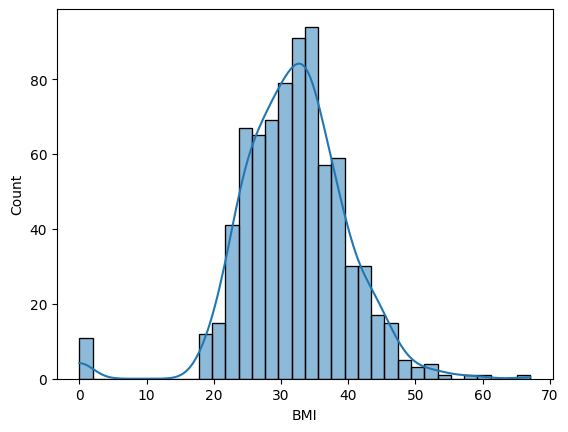

Skewness: -0.42814327880861786


In [13]:
sns.histplot(diabetes['BMI'], kde=True)
plt.show()
print("Skewness:", skew(diabetes['BMI']))

California

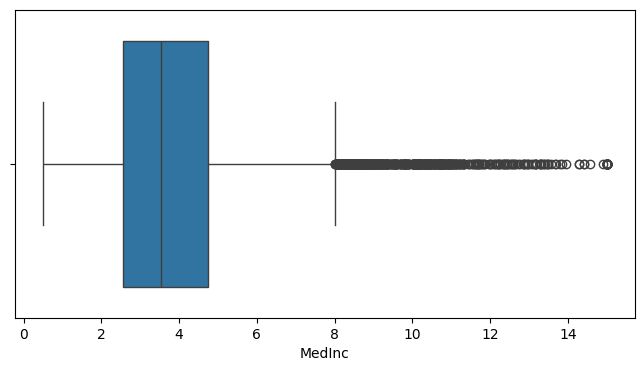

In [17]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['MedInc'])

plt.show()

In [18]:
df['z_score'] = zscore(df['MedInc'])

outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos


print("Valores atípicos detectados:\n", outliers_positivos, outliers_negativos)

Valores atípicos detectados:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
409    10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
510    11.8603      39.0  7.911111   0.984127       808.0  2.565079     37.82   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512    12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20376  10.2614      16.0  6.421277   0.919149       578.0  2.459574     34.16   
20380  10.1597      16.0  7.606936   1.121387       450.0  2.601156     34.14   
20389  10.0595      26.0  8.692308   1.076923       573.0  3.148352     34.19   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21  

In [19]:
Q1 = np.percentile(df['MedInc'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['MedInc'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['MedInc'] < limite_inferior) | (df['MedInc'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

Outliers encontrados:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     34.33   

    

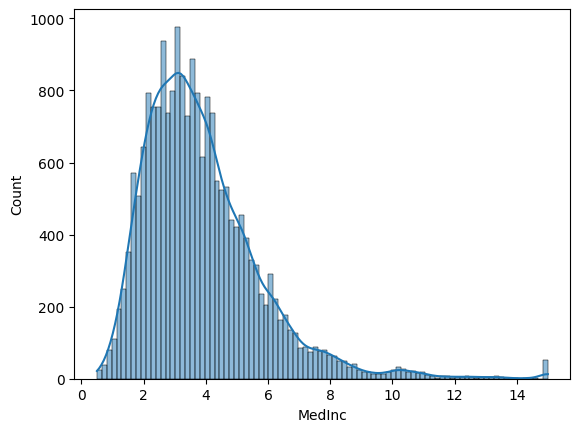

Skewness: 1.64653702990008


In [22]:
sns.histplot(df['MedInc'], kde=True)
plt.show()
print("Skewness:", skew(df['MedInc']))

In [24]:
df['valores_log'] = np.log1p(df['MedInc'])
print("Skewness:", skew(df['valores_log']))

Skewness: 0.2260666998795291


In [25]:
df['valores_winsor'] = winsorize(df['MedInc'], limits=[0.05, 0.05])
print("Skewness:", skew(df['valores_winsor']))

Skewness: 0.6382909087061247


Inventory_v2

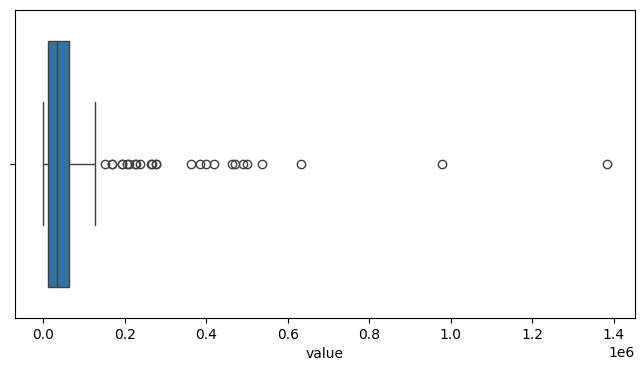

In [33]:
inventory = pd.read_csv("Inventory_v2.csv")

plt.figure(figsize=(8, 4))
sns.boxplot(x=inventory['value']) 
plt.show()

In [34]:
inventory['z_score'] = zscore(inventory['value'])

outliers_positivos = inventory[inventory['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = inventory[inventory['z_score'] < -3]  # Solo valores muy bajos


print("Valores atípicos detectados:\n", outliers_positivos, outliers_negativos)

Valores atípicos detectados:
     product.partNumber location.locationIdentifier inventoryType  quantity  \
109           83008400                        LT-1          ITEM       177   
142            2530020                        LT-2          ITEM       536   
147           83008400                        LT-2          ITEM       250   

    quantityUnits      value valueCurrency  reservationOrders  daysOfSupply  \
109            EA   978810.0           USD                  0             5   
142            EA   632480.0           USD                  0            10   
147            EA  1382500.0           USD                  0            28   

     shelfLife  ...  quantityLowerThreshold  daysOfSupplyUpperThreshold  \
109        365  ...                     100                          30   
142        365  ...                     100                          30   
147        365  ...                     100                          30   

     daysOfSupplyLowerThreshold  expiri

In [35]:
Q1 = np.percentile(inventory['value'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(inventory['value'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = inventory[(inventory['value'] < limite_inferior) | (inventory['value'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

Outliers encontrados:
     product.partNumber location.locationIdentifier inventoryType  quantity  \
103            2530003                        LT-1          ITEM       214   
104            2530020                        LT-1          ITEM       455   
105            7903986                        LT-1          ITEM       228   
107           83008200                        LT-1          ITEM       116   
108           83008300                        LT-1          ITEM       109   
109           83008400                        LT-1          ITEM       177   
110           89820200                        LT-1          ITEM       164   
111           83600200                        LT-1          ITEM       184   
112           83600300                        LT-1          ITEM       288   
113            9664145                        LT-1          ITEM       248   
114            9664146                        LT-1          ITEM       188   
119           82500380                   

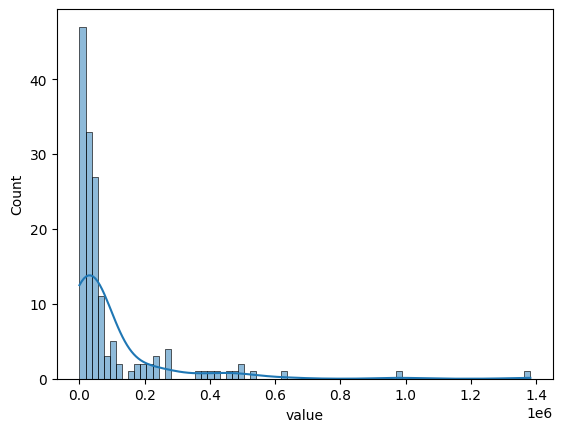

Skewness: 4.163668124495897


In [36]:
sns.histplot(inventory['value'], kde=True)
plt.show()
print("Skewness:", skew(inventory['value']))

In [37]:
inventory['valores_log'] = np.log1p(inventory['value'])
print("Skewness:", skew(inventory['valores_log']))

Skewness: -2.0012032223457874


In [45]:
inventory['valores_winsor'] = winsorize(inventory['value'], limits=[0.05, 0.2])
print("Skewness:", skew(inventory['valores_winsor']))

Skewness: 0.648864940083756


Diamonds